# Wine Quality Project

### Introduction

In this project, a dataset on wine quality from the UCI website (https://archive.ics.uci.edu/ml/datasets/wine+quality) is analyzed, visualized and investigated and also regression and classification models are employed to predict the quality of wines on the basis of their features.  

### Importing required modules

In [149]:
#importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Reading the csv datasets

In [150]:
#reading the csv files for red wines
df_red = pd.read_csv('winequality-red.csv', sep=';')
df_red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [151]:
#reading the csv file for white wines
df_white = pd.read_csv('winequality-white.csv', sep=';')
df_white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

### Getting some information on the datasets

In [152]:
#getting the info on the red wine dataset
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All the data in different columns in red wine dataset are floats and the qualiy column has integer type data.

In [153]:
#checking the shape of the red wine dataset
df_red.shape

(1599, 12)

There are 12 columns and 1599 rows in the red wine dataset.

In [154]:
#checking the columns of the red wine dataset
df_red.columns.values


array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

The column titles in red wine dataset are shown above.

In [155]:
#getting the info on the white wine dataset
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


All the data in different columns in white wine dataset are floats and the qualiy column has integer type data.

In [156]:
#checking the shape of the white wine dataset
df_white.shape

(4898, 12)

There are 12 columns and 4898 rows in the red wine dataset.

In [157]:
#checking the columns of the white wine dataset
df_white.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

The column titles in white wine dataset are shown above.

### Checking the statistics of datasets

In [158]:
#checking the stats of red wine dataset
df_red.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [159]:
#checking the stats of white wine dataset
df_white.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In the case of 'residual sugar', 'free sulfur dioxide' and 'total sulfur dioxide' there is a remarkable difference between 75 percentile and maximum and also between 25 percentila and minimum which indicates a big number of outliers in these columns. 

### Data Visulalization

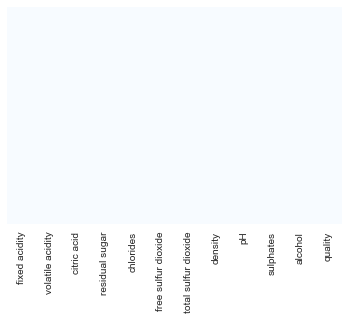

In [160]:
#checking for null values in the columns using a heatmap in red wine dataset
sns.heatmap(df_red.isnull(),cbar=False,yticklabels=False,cmap = 'Blues')

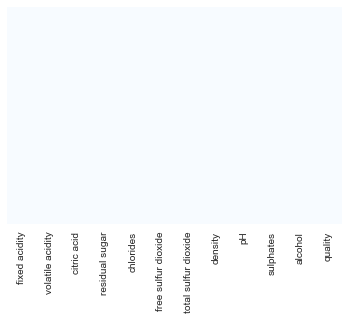

In [161]:
#checking for null values in the columns using a heatmap in white wine dataset
sns.heatmap(df_white.isnull(),cbar=False,yticklabels=False,cmap = 'Blues')

In the columns in any of the red wine or white wine datasets we do not have any null values. In case there was any null value there would be a different shade of blue for that perticular value.

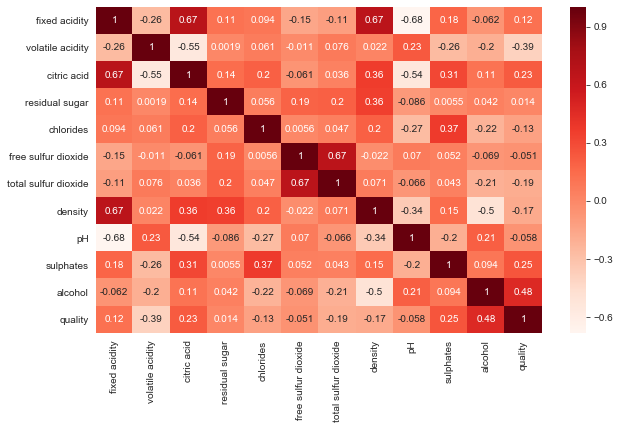

In [162]:
#Checking the correlation bertween the features in red wine dataset
plt.figure(figsize=(10,6))
sns.heatmap(df_red.corr(), annot=True, cmap='Reds')

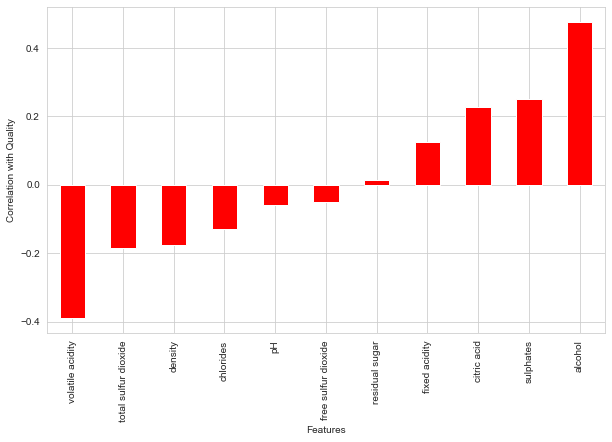

In [163]:
#Checking the correlation bertween the features in red wine dataset with regards to quality using a bar graph
plt.figure(figsize=(10,6))
plt.xlabel('Features')
plt.ylabel('Correlation with Quality')
df_red.corr()['quality'][:-1].sort_values().plot(kind='bar', color='r')

Among the features in the red wine dataset, citric acid and fixed acidity (0.67), density and fixed acidity (0.67) and total sulfure dioxide and free sulfure dioxide (0.67) have the highest positive correlations and citric acid and volatile acidity (-0.55), citric acid and pH (-0.54), alcohol and density (-0.5) and fixed acidity and pH (-0.68) have the highest negative correlations.

In red wine dataset, 'alcohol', 'sulphates' anf 'citric acid' have the highest positive correlations with the quality and 'volatile acidity', 'total sulfure dioxide' and 'density' have the highest negative correlation with the quality.

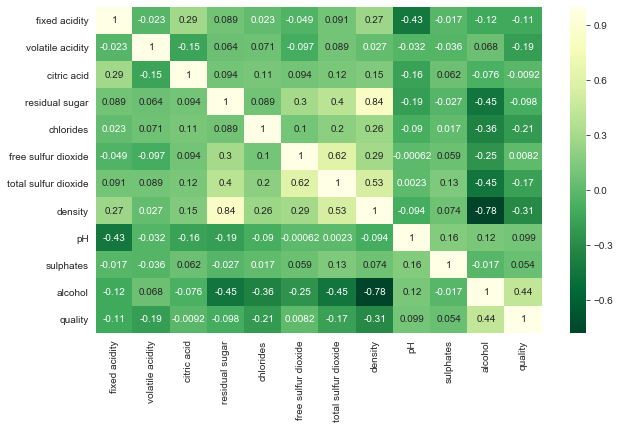

In [164]:
#Checking the correlation bertween the features in white wine dataset
plt.figure(figsize=(10,6))
sns.heatmap(df_white.corr(), annot=True, cmap='YlGn_r')

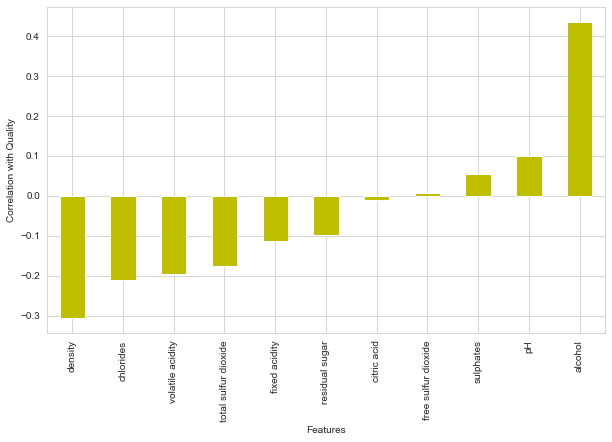

In [165]:
#Checking the correlation bertween the features in white wine dataset with regards to quality
plt.figure(figsize=(10,6))
plt.xlabel('Features')
plt.ylabel('Correlation with Quality')
df_white.corr()['quality'][:-1].sort_values().plot(kind='bar', color="y")

Among the features in the white wine dataset, density and residual sugars (0.84), density and total sulfure oxide (0.51) and total sulfure dioxide and free sulfure dioxide (0.62) have the highest positive correlations. On the other hand alcohol and density (-0.78) have the highest negative correlation.

In white wine dataset, 'alcohol', 'pH' anf 'sulphates' have the highest positive correlations with the quality and 'density', 'chlorides' and 'volatile acidity' have the highest negative correlation with the quality.

### Checking the distribution of the features in the dataset

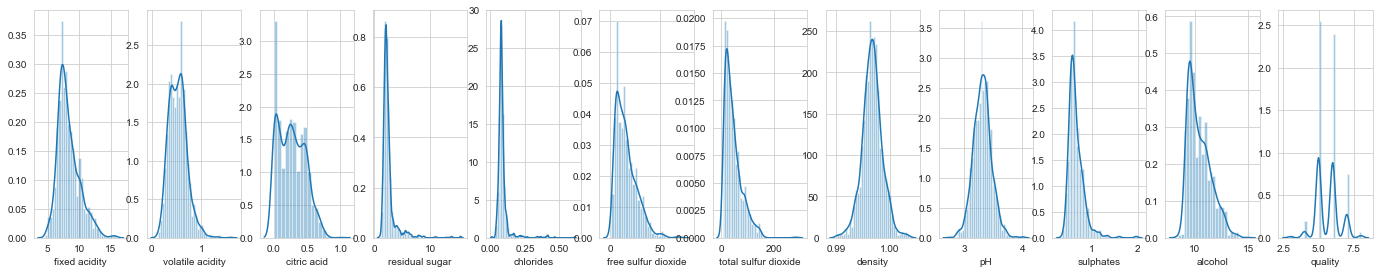

In [166]:
#Plotting out distributions for the variablesin red wine dataset
l = df_red.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df_red[l[i]],kde=True)

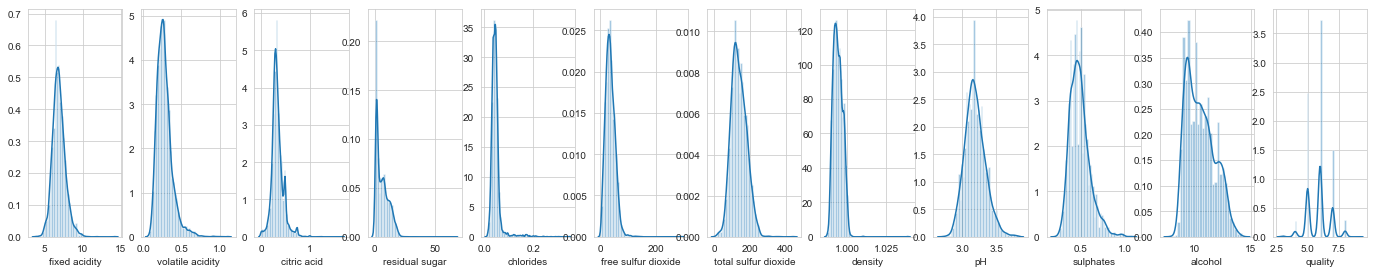

In [167]:
#Plotting out distributions for the variablesin white wine dataset

plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df_white[l[i]],kde=True)

pH seems to be distributed normally. alcohol, sulphates, total slfur dioxide and fixed acidity are fairly normally distributed. All other features have a right skewness. 

### Checking the outliers in data

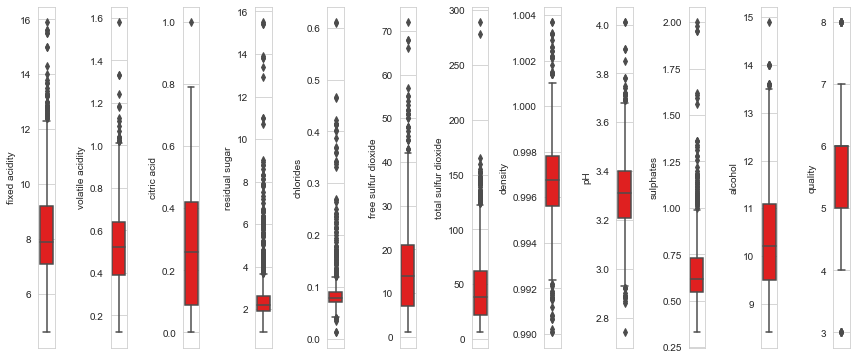

In [168]:
#making boxplots to visualize the outliers in the features in red wine dataset
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df_red[l[i]],color='red',orient='v')
    plt.tight_layout()

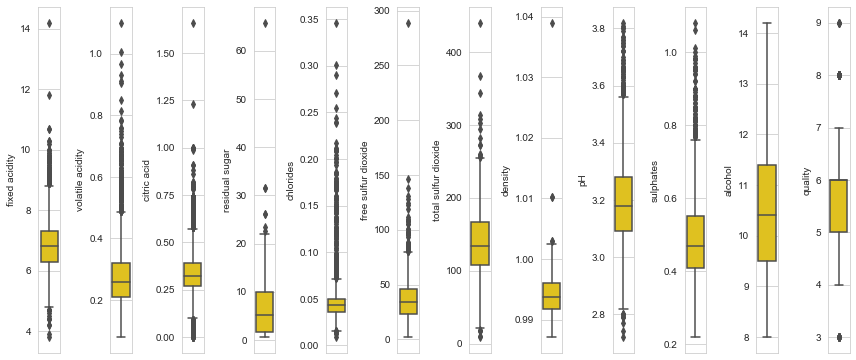

In [169]:
#making boxplots to visualize the outliers in the features in white wine dataset
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df_white[l[i]],color='gold',orient='v')
    plt.tight_layout()

Except for the feature 'alcohol'  in white wine dataset, all other features in both datasets have outliers.

### Checking the correlations among the features

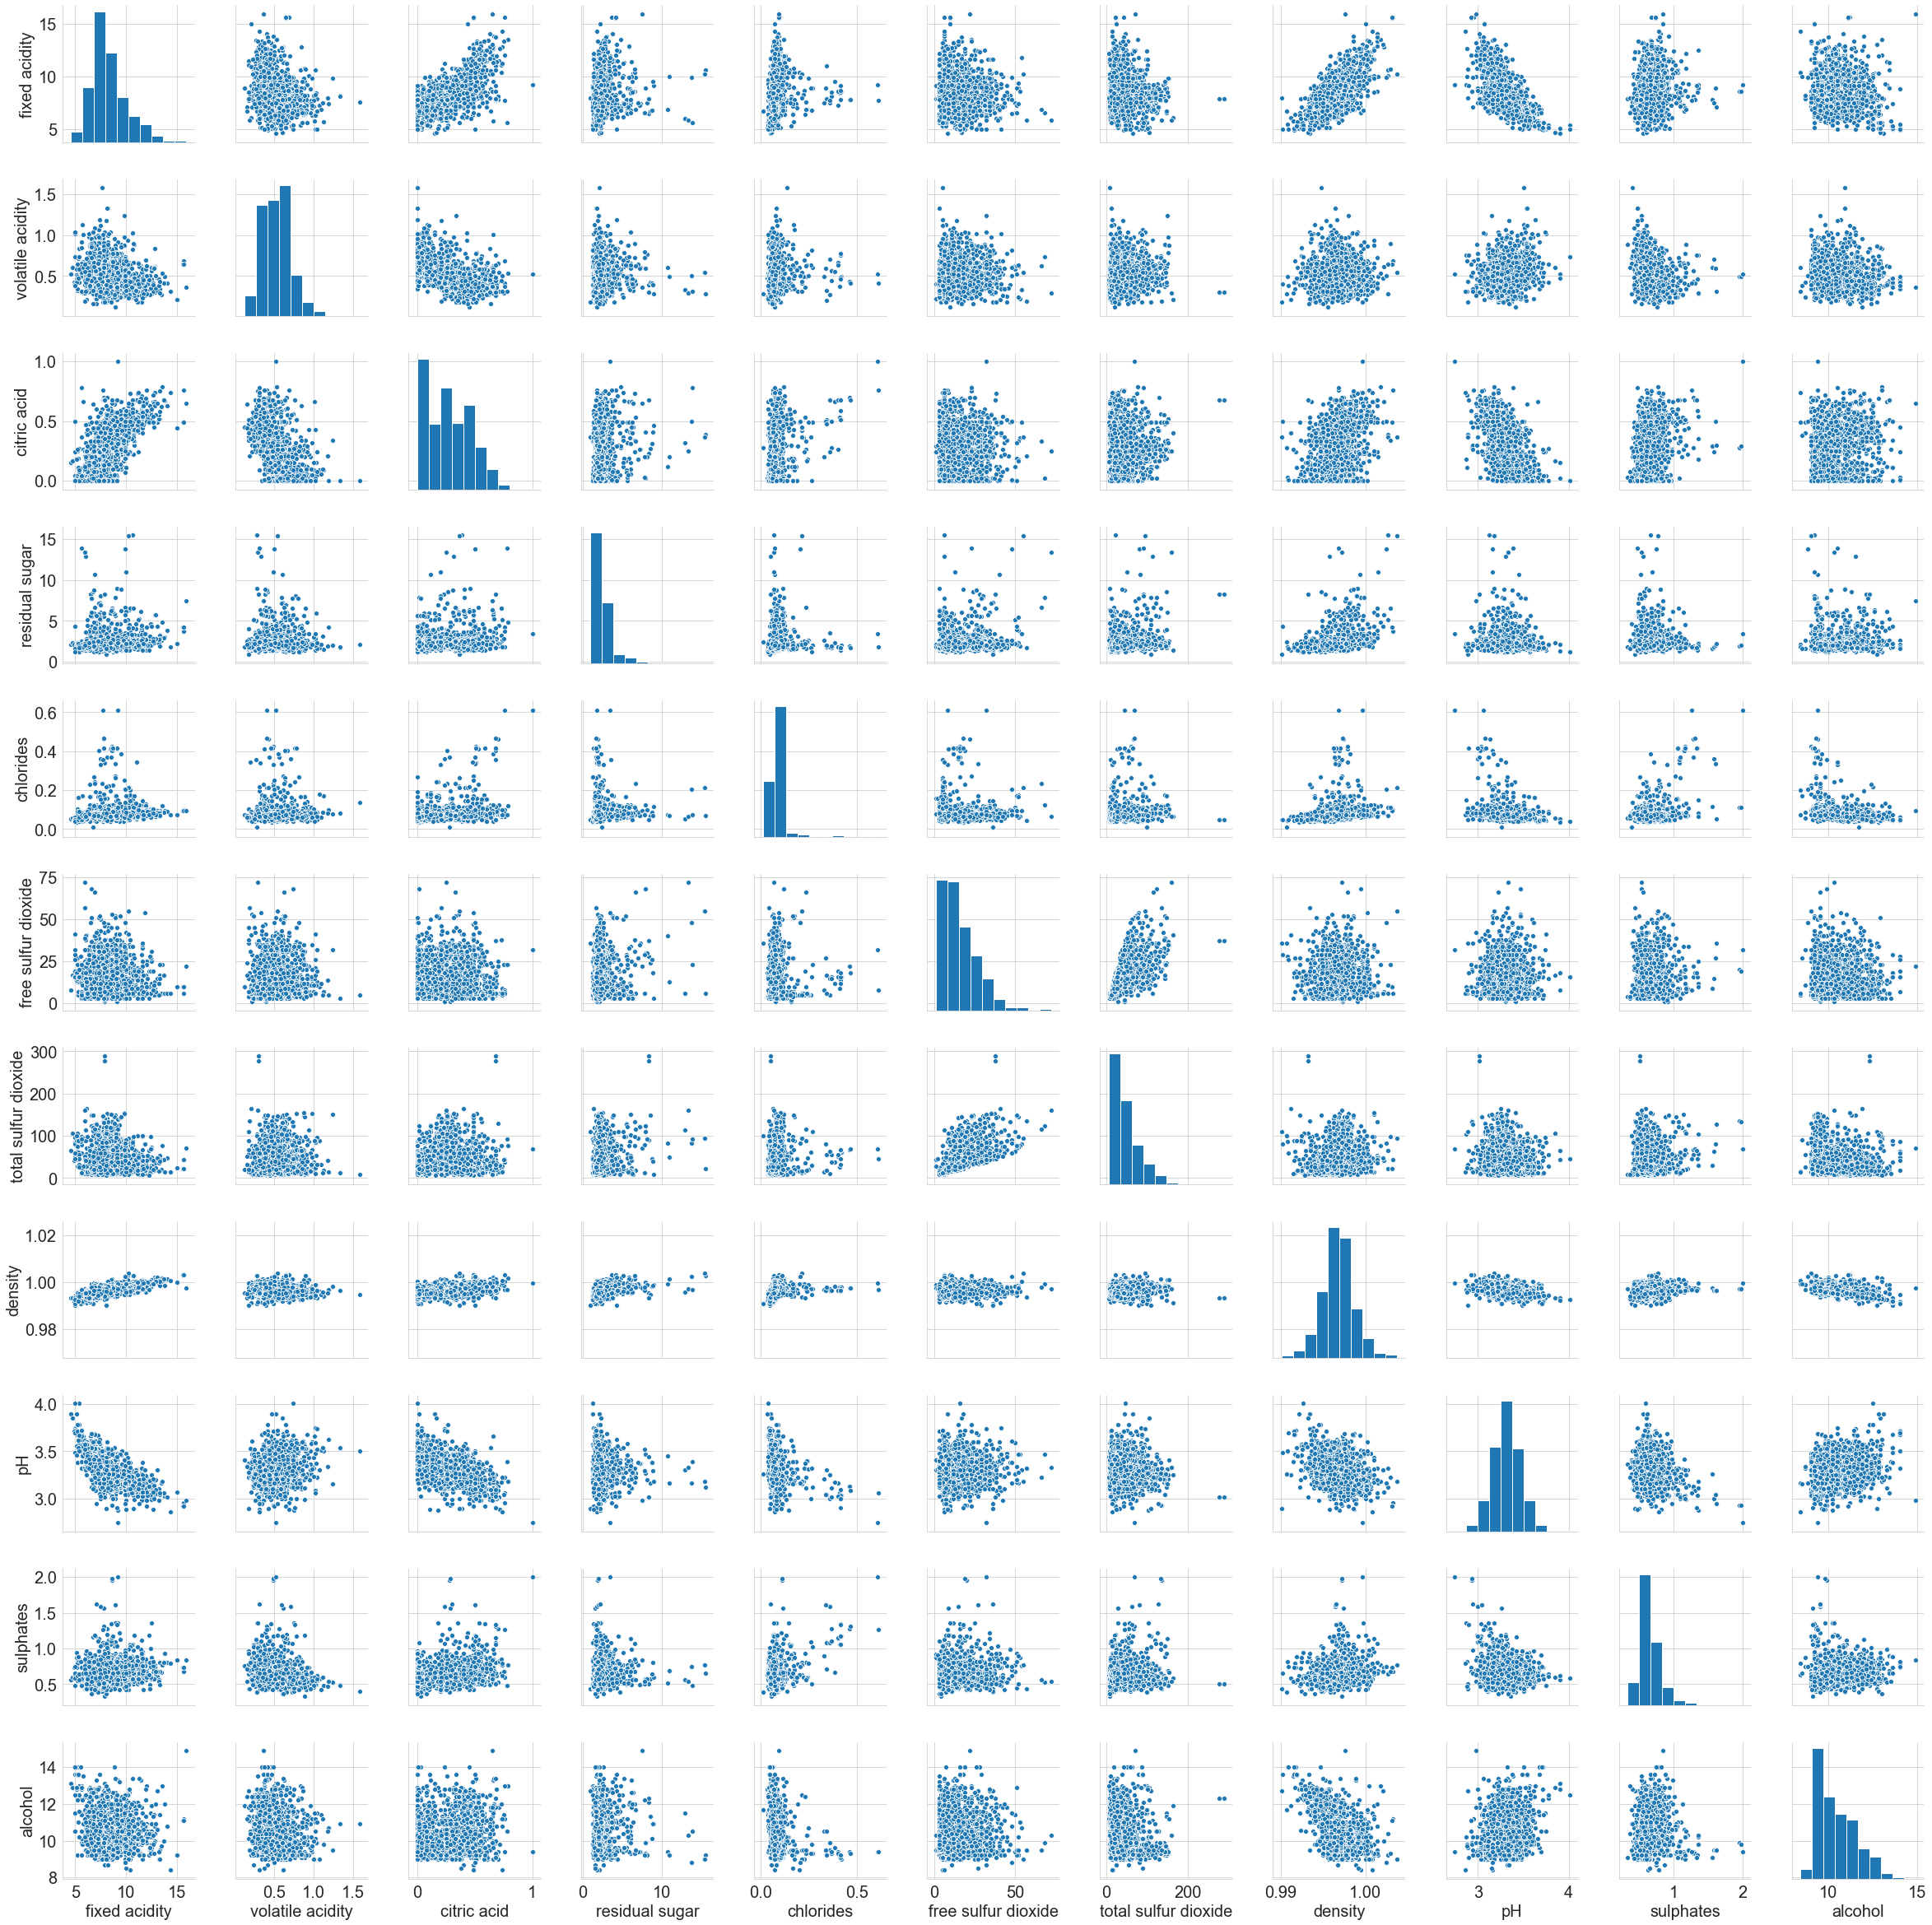

In [170]:
#creating pairplots to check the correlations in red wine dataset
plt.rcParams.update({'font.size': 20})
sns.pairplot(df_red.loc[:, df_red.columns != 'quality'], height=3)

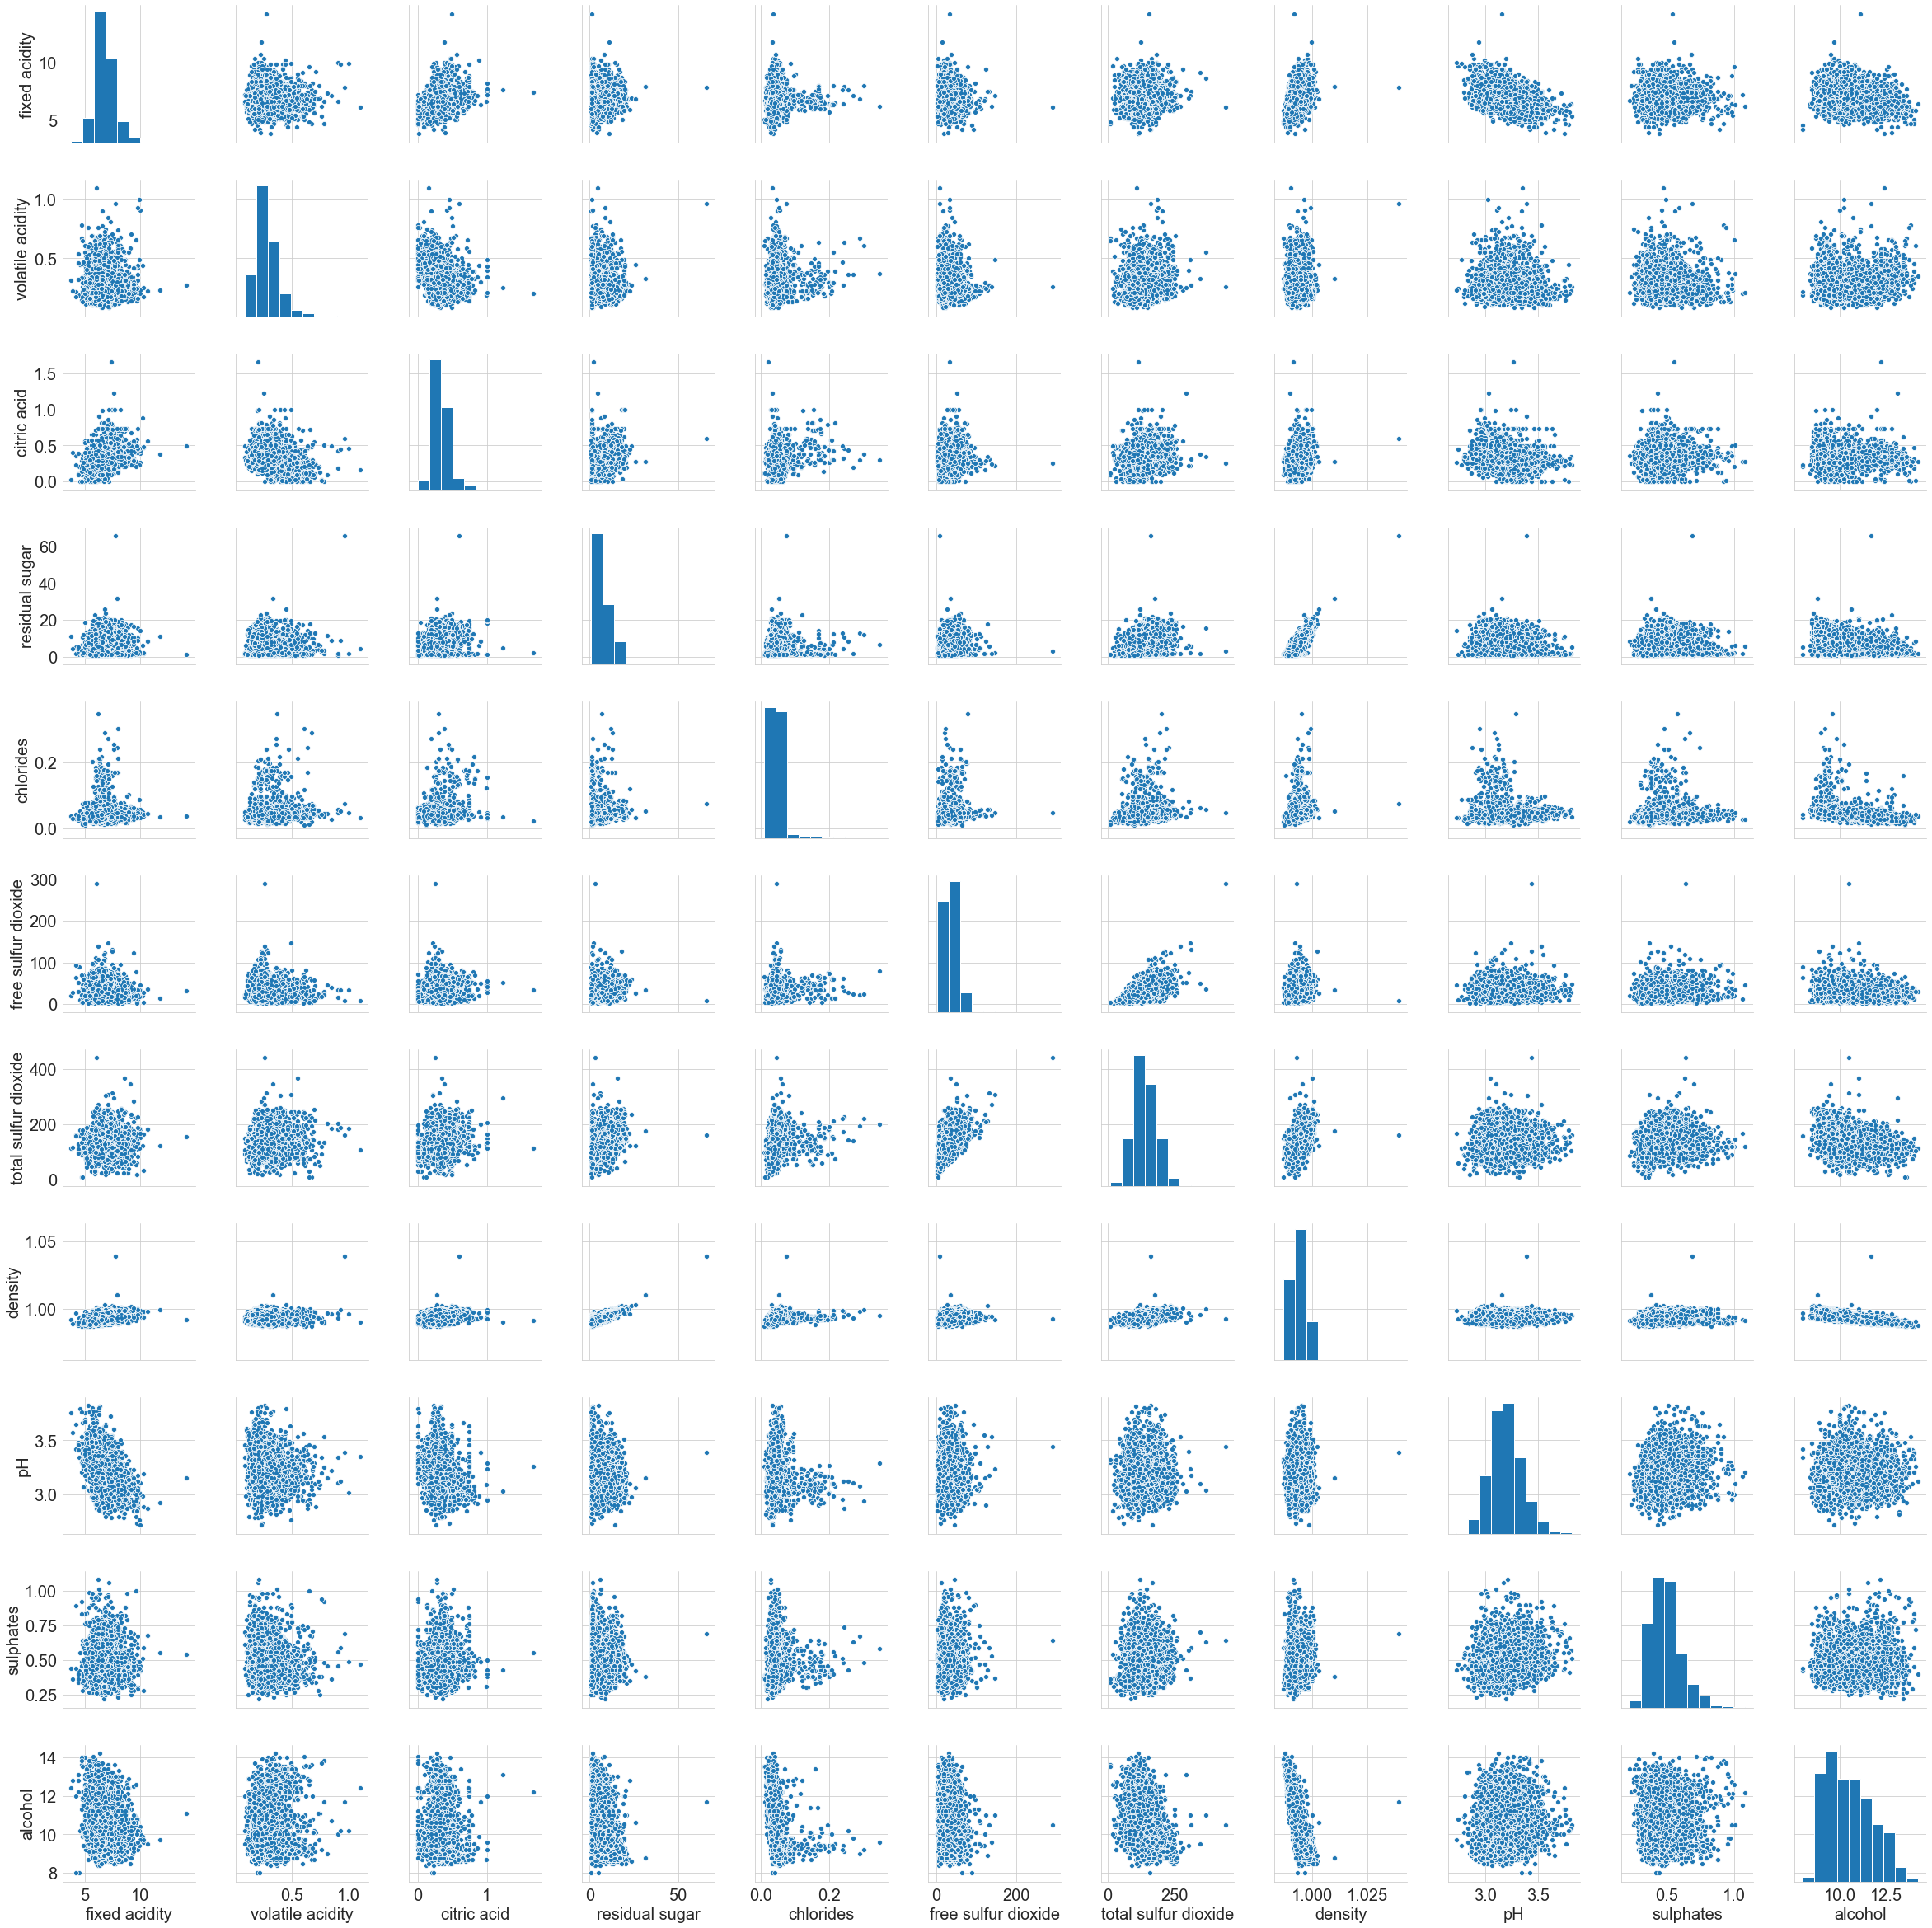

In [171]:
#creating pairplots to check the correlations in white wine dataset
plt.rcParams.update({'font.size': 20})
sns.pairplot(df_white.loc[:, df_white.columns != 'quality'], height=3)

The scatter plots in the pairplots above show the correlations and dependence of different features on each other.

### Appending the datasets

In [172]:
df_red['color']='red'
df_white['color']='white'
df = df_red.append(df_white)
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

### Visulization of features 

###### Number of wines in each quality

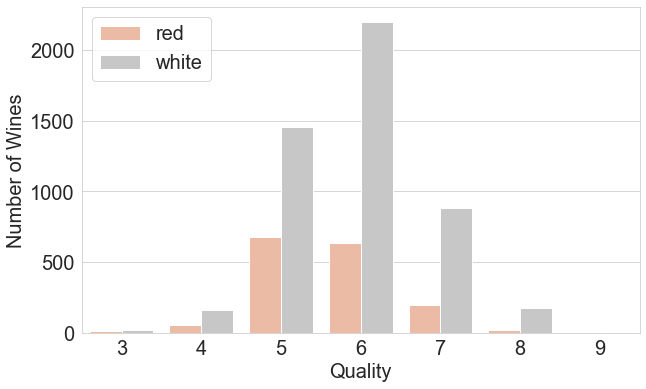

In [173]:
#Making a bar plot of the number of wines in eacg quality
plt.figure(figsize=(10,6))
sns.countplot(x='quality', hue='color', palette='RdGy', data=df)
plt.xlabel("Quality")
plt.ylabel("Number of Wines")
plt.legend(loc='best')

In the case of both datasets (red and white wines), we have the most number of wines with the qualities 5, 6 and 7.

##### Quality and alcohol

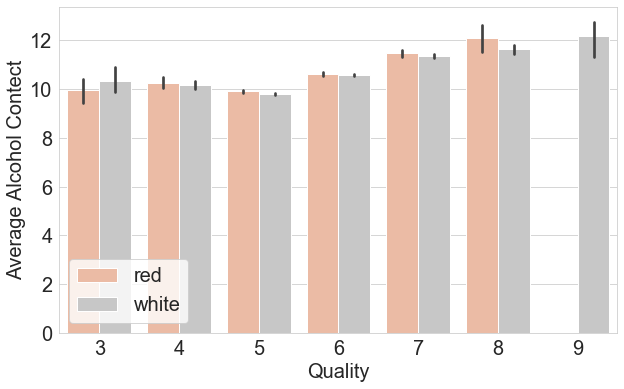

In [174]:
#Making a bar plot of the quality of the wines versus their average alcohol content
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='alcohol', hue='color', palette='RdGy',data=df)
plt.xlabel("Quality")
plt.ylabel("Average Alcohol Contect")
plt.legend(loc='best')

As observed in the graph above, the wines of qualities 3, 4, 5 and 6 in general have an average alcohol contect of around 10%, whereas higher quality wines (quality 7, 8 and 9) have higher alcohol content (11-12%).

##### Quality and  pH

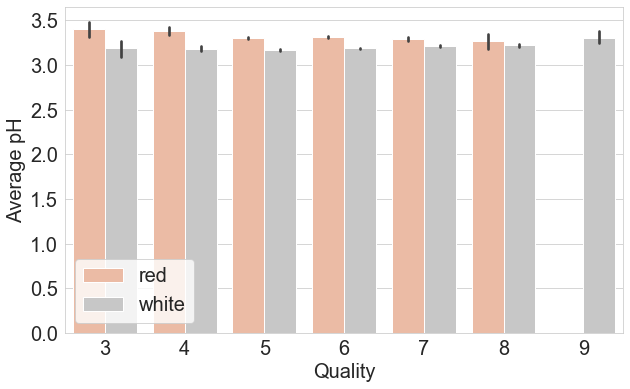

In [175]:
#Making a bar plot of the quality of the wines versus their average pH
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='pH', hue='color', palette='RdGy',data=df)
plt.xlabel("Quality")
plt.ylabel("Average pH")
plt.legend(loc='best')

The average pH of all wines apears to be between 3 and 3.5.

##### Quality and residual sugars

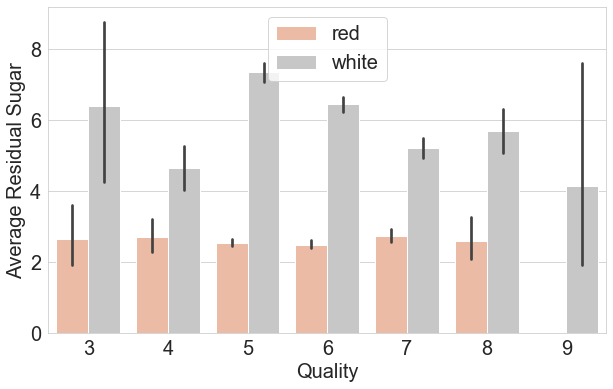

In [176]:
#Making a bar plot of the quality of the wines versus their average residual sugar
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='residual sugar', hue='color', palette='RdGy',data=df)
plt.xlabel("Quality")
plt.ylabel("Average Residual Sugar")
plt.legend(loc='best')

In general white wines have more residual sugars that red wines. Red wines all have similar residual sugars (around 2.5) however average residual sugar content of white wines varies between 4 and 7. The quality of wines however does not show much dependence on the residual sugars content.

##### Quality and citric acid

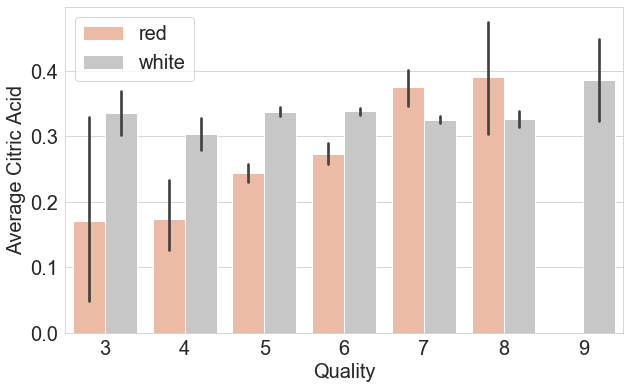

In [177]:
#Making a bar plot of the quality of the wines versus their average citric acid
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='citric acid', hue='color', palette='RdGy',data=df)
plt.xlabel("Quality")
plt.ylabel("Average Citric Acid")
plt.legend(loc='best')

For white wines, the citric acid does not seem to be playing a significant role in quality although white wines of quality 9 have higher citric acid content. However, in the case of red wines the higher the citric acid content, the higher the quality.

##### Quality and sulphates

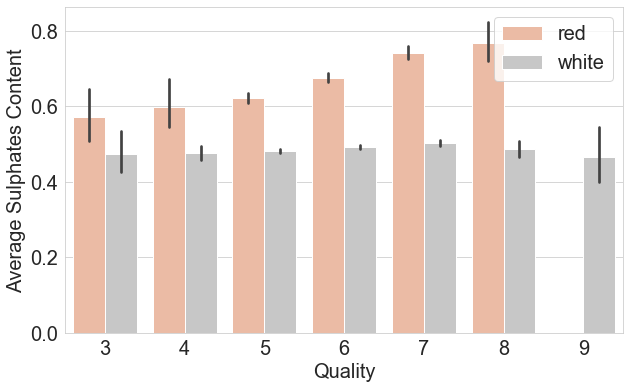

In [178]:
#Making a bar plot of the quality of the wines versus their average sulphates content
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='sulphates', hue='color', palette='RdGy',data=df)
plt.xlabel("Quality")
plt.ylabel("Average Sulphates Content")
plt.legend(loc='best')

All white wines have the same level of sulphates (around 5) however for red wines the higher the sulphate content of the wine, the higher its quality.

##### Quality and chlorides

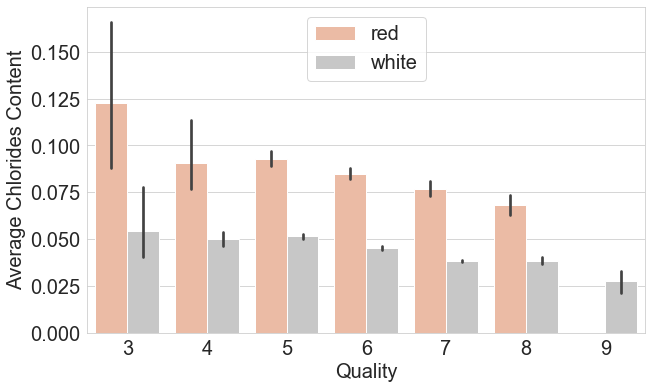

In [179]:
#Making a bar plot of the quality of the wines versus their average chloride content
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='chlorides', hue='color', palette='RdGy',data=df)
plt.xlabel("Quality")
plt.ylabel("Average Chlorides Content")
plt.legend(loc='best')

In the case of both red and white wines the lower the chlorides content of the wine, the higher its quality. Also red wines have much higher chlorides content in comparison to white wines.

# Machine learning

Here we will predict the wine quality on a scale of 3 to 9 by modeling its features.

### Selecting the features with high correlation with the quality 

##### Red Wine

In [180]:
def red_features(threshold):
    corrs = df_red.corr()['quality'].drop('quality').abs()
    selected_corrs = corrs[corrs>threshold].index.values.tolist()
   

    return selected_corrs

In [181]:
features = red_features(0.1)
print(features)

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']


##### White wine

In [182]:
def white_features(threshold):
    corrs = df_white.corr()['quality'].drop('quality').abs()
    selected_corrs = corrs[corrs>threshold].index.values.tolist()
   

    return selected_corrs

In [183]:
wfeatures = white_features(0.1)
print(wfeatures)

['fixed acidity', 'volatile acidity', 'chlorides', 'total sulfur dioxide', 'density', 'alcohol']


### Splitting the dataset into train and test

Here we split our dataset into rain and test dataset. We will use the train dataset to train our model and then we will use our test dataset to test and evaluate our model.

##### Red Wine

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
#identifying the dependent variables and independent variable
X = df_red[features]
y = df_red['quality']

##### White Wine

In [186]:
#identifying the dependent variables and independent variable
Xw = df_white[wfeatures]
yw = df_white['quality']

### Normalizing the data

We will use Min-Max scaler to normalize the dataset.

##### Red Wine

In [187]:
#importing preprocessing to normalize the dataset
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X = pd.DataFrame(min_max_scaler.fit_transform(X))

In [188]:
#checking the head of the features (independent variables)
X.head()

0         1     2         3         4         5         6         7
0  0.247788  0.397260  0.00  0.106845  0.098940  0.567548  0.137725  0.153846
1  0.283186  0.520548  0.00  0.143573  0.215548  0.494126  0.209581  0.215385
2  0.283186  0.438356  0.04  0.133556  0.169611  0.508811  0.191617  0.215385
3  0.584071  0.109589  0.56  0.105175  0.190813  0.582232  0.149701  0.215385
4  0.247788  0.397260  0.00  0.106845  0.098940  0.567548  0.137725  0.153846

In [189]:
#checking the head of the dependent variable (quality)
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [190]:
#splitting the dataset into train and test datasets (red wine) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [191]:
Xw = pd.DataFrame(min_max_scaler.fit_transform(Xw))
Xw = pd.DataFrame(min_max_scaler.fit_transform(Xw))

In [194]:
#splitting the dataset into train and test datasets (white wine)
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw, yw, test_size=0.3,random_state=0)

### Training Regression Models

##### Random Forest Regressor

###### Red Wine

In [193]:
#importing Linear Regression model, buidling it and fitting the train data
from sklearn.ensemble import RandomForestRegressor

for estimators in [10,100,200,300]:
    for split in [2,10,15,20]:
        for leaf in [2,10,15,20]:
            rf = RandomForestRegressor(n_estimators=estimators, min_samples_split=split, min_samples_leaf=leaf)
            rf.fit(X_train, y_train)
            pred = rf.predict(X_test)
            print("When n_estimators is:{0} and min_samples_split is:{1} and min_samples_leaf is:{2}".format(estimators, split,leaf),
              mean_absolute_error(pred, y_test))

When n_estimators is:10 and min_samples_split is:2 and min_samples_leaf is:2 0.45723710317460325
When n_estimators is:10 and min_samples_split is:2 and min_samples_leaf is:10 0.4769599395412771
When n_estimators is:10 and min_samples_split is:2 and min_samples_leaf is:15 0.4807136062490837
When n_estimators is:10 and min_samples_split is:2 and min_samples_leaf is:20 0.4930924633893536
When n_estimators is:10 and min_samples_split is:10 and min_samples_leaf is:2 0.46312372925223644
When n_estimators is:10 and min_samples_split is:10 and min_samples_leaf is:10 0.48220360441377236
When n_estimators is:10 and min_samples_split is:10 and min_samples_leaf is:15 0.4797688555635872
When n_estimators is:10 and min_samples_split is:10 and min_samples_leaf is:20 0.4858684485414459
When n_estimators is:10 and min_samples_split is:15 and min_samples_leaf is:2 0.47271688497136743
When n_estimators is:10 and min_samples_split is:15 and min_samples_leaf is:10 0.4787200481307574
When n_estimators is:10

The n_estimators=200, min_samples_split=2 and min_samples_leaf=2 are the optimum parameters to be used in Random Forest regressor model. Using these parameters the mean absolute error is 0.440.

In [195]:

for estimators in [10,100,200,300]:
    for split in [2,10,15,20]:
        for leaf in [2,10,15,20]:
            rf = RandomForestRegressor(n_estimators=estimators, min_samples_split=split, min_samples_leaf=leaf)
            rf.fit(Xw_train, yw_train)
            pred = rf.predict(Xw_test)
            print("When n_estimators is:{0} and min_samples_split is:{1} and min_samples_leaf is:{2}".format(estimators, split,leaf),
              mean_absolute_error(pred, yw_test))

When n_estimators is:10 and min_samples_split is:2 and min_samples_leaf is:2 0.5199264845132193
When n_estimators is:10 and min_samples_split is:2 and min_samples_leaf is:10 0.5703606750464033
When n_estimators is:10 and min_samples_split is:2 and min_samples_leaf is:15 0.5764505453852365
When n_estimators is:10 and min_samples_split is:2 and min_samples_leaf is:20 0.5884641240967151
When n_estimators is:10 and min_samples_split is:10 and min_samples_leaf is:2 0.5333031583283462
When n_estimators is:10 and min_samples_split is:10 and min_samples_leaf is:10 0.5689491987945278
When n_estimators is:10 and min_samples_split is:10 and min_samples_leaf is:15 0.581451527313679
When n_estimators is:10 and min_samples_split is:10 and min_samples_leaf is:20 0.5801007442171335
When n_estimators is:10 and min_samples_split is:15 and min_samples_leaf is:2 0.5473250272171316
When n_estimators is:10 and min_samples_split is:15 and min_samples_leaf is:10 0.5631054024882077
When n_estimators is:10 and 

The n_estimators=200, min_samples_split=2 and min_samples_leaf=2 are the optimum parameters to be used in Random Forest regressor model for white wine dataset as well. Using these parameters the mean absolute error is 0.497.

###### Red Wine

##### KNN Regression

In [196]:
#importing knn Regression model, buidling it and fitting the train data
from sklearn.neighbors import KNeighborsRegressor

for i in [3,5,7,10,15,20]:
    knnr = KNeighborsRegressor(n_neighbors=i)
    knnr.fit(X_train, y_train)
    pred = knnr.predict(X_test)
    print( i, mean_absolute_error(pred, y_test))

3 0.5076388888888889
5 0.5104166666666666
7 0.5220238095238096
10 0.521875
15 0.5186111111111111
20 0.5115625


For the knn regressor, the best n_neighbors is 3 and the mean absolute error under this condition is 0.507.

###### White Wine

In [197]:
for i in [3,5,7,10,15,20]:
    knnr = KNeighborsRegressor(n_neighbors=i)
    knnr.fit(Xw_train, yw_train)
    pred = knnr.predict(Xw_test)
    print( i, mean_absolute_error(pred, yw_test))

3 0.5712018140589569
5 0.5797278911564626
7 0.5833819241982507
10 0.5927891156462584
15 0.5912471655328798
20 0.5926190476190477


For the knn regressor for white wine dataset as well, the best n_neighbors is 3 and the mean absolute error under this condition is 0.571.

### Training Classification Modles

##### Random Forest Classifier

###### Red Wine

In [205]:
#importing random forest classifier model, buidling it and fitting the train dataset (red wine)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

for estimators in [10,100,200,300]:
    for split in [2,10,15,20]:
        for leaf in [2,10,15,20]:
            rfc = RandomForestClassifier(n_estimators=estimators, min_samples_split=split, min_samples_leaf=leaf)
            rfc.fit(X_train,y_train)
            pred = rfc.predict(X_test)
            print("When n_estimators is:{0} and min_samples_split is:{1} and min_samples_leaf is:{2}".format(estimators, split,leaf),
              classification_report(pred, y_test), confusion_matrix(pred, y_test))

When n_estimators is:10 and min_samples_split is:2 and min_samples_leaf is:2              precision    recall  f1-score   support

          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       0.74      0.70      0.72       219
          6       0.68      0.66      0.67       208
          7       0.60      0.51      0.55        53
          8       0.00      0.00      0.00         0

avg / total       0.70      0.66      0.68       480
 [[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  3  12 154  47   3   0]
 [  0   3  50 138  15   2]
 [  0   0   4  19  27   3]
 [  0   0   0   0   0   0]]
When n_estimators is:10 and min_samples_split is:2 and min_samples_leaf is:10              precision    recall  f1-score   support

          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       0.73      0.68      0.70       222
          6       0.66      0.61      0.63

When n_estimators is:100 and min_samples_split is:2 and min_samples_leaf is:2              precision    recall  f1-score   support

          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       0.78      0.73      0.75       222
          6       0.67      0.67      0.67       206
          7       0.60      0.52      0.56        52
          8       0.00      0.00      0.00         0

avg / total       0.71      0.68      0.70       480
 [[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  1  10 162  48   1   0]
 [  2   5  43 137  17   2]
 [  0   0   3  19  27   3]
 [  0   0   0   0   0   0]]
When n_estimators is:100 and min_samples_split is:2 and min_samples_leaf is:10              precision    recall  f1-score   support

          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       0.74      0.73      0.73       211
          6       0.71      0.62      0.

When n_estimators is:100 and min_samples_split is:20 and min_samples_leaf is:10              precision    recall  f1-score   support

          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       0.73      0.71      0.72       215
          6       0.68      0.60      0.64       229
          7       0.40      0.50      0.44        36
          8       0.00      0.00      0.00         0

avg / total       0.68      0.64      0.66       480
 [[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  1  10 152  51   1   0]
 [  2   5  56 138  26   2]
 [  0   0   0  15  18   3]
 [  0   0   0   0   0   0]]
When n_estimators is:100 and min_samples_split is:20 and min_samples_leaf is:15              precision    recall  f1-score   support

          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       0.77      0.72      0.74       225
          6       0.67      0.64     

When n_estimators is:200 and min_samples_split is:15 and min_samples_leaf is:15              precision    recall  f1-score   support

          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       0.74      0.70      0.72       219
          6       0.67      0.61      0.64       226
          7       0.33      0.43      0.38        35
          8       0.00      0.00      0.00         0

avg / total       0.68      0.64      0.66       480
 [[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  3  10 154  51   1   0]
 [  0   5  52 137  29   3]
 [  0   0   2  16  15   2]
 [  0   0   0   0   0   0]]
When n_estimators is:200 and min_samples_split is:15 and min_samples_leaf is:20              precision    recall  f1-score   support

          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       0.75      0.71      0.73       222
          6       0.67      0.61     

When n_estimators is:300 and min_samples_split is:10 and min_samples_leaf is:20              precision    recall  f1-score   support

          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       0.75      0.70      0.73       222
          6       0.68      0.61      0.64       225
          7       0.33      0.45      0.38        33
          8       0.00      0.00      0.00         0

avg / total       0.69      0.64      0.66       480
 [[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  3  10 156  52   1   0]
 [  0   5  50 138  29   3]
 [  0   0   2  14  15   2]
 [  0   0   0   0   0   0]]
When n_estimators is:300 and min_samples_split is:15 and min_samples_leaf is:2              precision    recall  f1-score   support

          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       0.78      0.73      0.76       223
          6       0.69      0.66      

n_estimators=200, min_samples_split=15 and min_samples_leaf=2 are the optimum parameters for random forest classifier and the mean absolute error using these paameters is 0.347.

###### White wine

In [206]:
#using random forest classifier model, buidling it and fitting the train dataset (white wine)
for estimators in [10,100,200,300]:
    for split in [2,10,15,20]:
        for leaf in [2,10,15,20]:
            rfc = RandomForestClassifier(n_estimators=estimators, min_samples_split=split, min_samples_leaf=leaf)
            rfc.fit(Xw_train,yw_train)
            pred = rfc.predict(Xw_test)
            print("When n_estimators is:{0} and min_samples_split is:{1} and min_samples_leaf is:{2}".format(estimators, split,leaf),
              classification_report(pred, yw_test), confusion_matrix(pred, yw_test))

When n_estimators is:10 and min_samples_split is:2 and min_samples_leaf is:2              precision    recall  f1-score   support

          3       0.00      0.00      0.00         0
          4       0.12      0.78      0.20         9
          5       0.62      0.65      0.64       441
          6       0.73      0.60      0.65       769
          7       0.52      0.60      0.56       233
          8       0.24      0.61      0.34        18

avg / total       0.65      0.61      0.63      1470
 [[  0   0   0   0   0   0]
 [  0   7   2   0   0   0]
 [  5  30 286  99  20   1]
 [  3  21 157 458 108  22]
 [  1   1  11  69 139  12]
 [  0   1   2   4   0  11]]
When n_estimators is:10 and min_samples_split is:2 and min_samples_leaf is:10              precision    recall  f1-score   support

          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       0.55      0.63      0.59       398
          6       0.75      0.52      0.62

When n_estimators is:10 and min_samples_split is:20 and min_samples_leaf is:20              precision    recall  f1-score   support

          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       0.51      0.61      0.56       381
          6       0.77      0.52      0.62       939
          7       0.31      0.55      0.39       150
          8       0.00      0.00      0.00         0

avg / total       0.65      0.54      0.58      1470
 [[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  5  28 233 101  14   0]
 [  4  28 220 485 171  31]
 [  0   4   5  44  82  15]
 [  0   0   0   0   0   0]]
When n_estimators is:100 and min_samples_split is:2 and min_samples_leaf is:2              precision    recall  f1-score   support

          3       0.00      0.00      0.00         0
          4       0.03      1.00      0.06         2
          5       0.61      0.70      0.65       402
          6       0.80      0.59      0.

When n_estimators is:100 and min_samples_split is:20 and min_samples_leaf is:2              precision    recall  f1-score   support

          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       0.56      0.67      0.61       387
          6       0.79      0.55      0.65       911
          7       0.36      0.57      0.44       169
          8       0.07      1.00      0.12         3

avg / total       0.68      0.58      0.61      1470
 [[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  3  32 258  81  13   0]
 [  5  26 196 498 157  29]
 [  1   2   4  51  97  14]
 [  0   0   0   0   0   3]]
When n_estimators is:100 and min_samples_split is:20 and min_samples_leaf is:10              precision    recall  f1-score   support

          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       0.53      0.64      0.58       380
          6       0.78      0.53      

When n_estimators is:200 and min_samples_split is:15 and min_samples_leaf is:10              precision    recall  f1-score   support

          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       0.52      0.65      0.58       370
          6       0.80      0.53      0.63       952
          7       0.30      0.55      0.39       146
          8       0.04      1.00      0.08         2

avg / total       0.68      0.56      0.59      1470
 [[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  4  29 239  83  15   0]
 [  4  29 216 501 172  30]
 [  1   2   3  46  80  14]
 [  0   0   0   0   0   2]]
When n_estimators is:200 and min_samples_split is:15 and min_samples_leaf is:15              precision    recall  f1-score   support

          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       0.51      0.63      0.56       375
          6       0.79      0.52     

When n_estimators is:300 and min_samples_split is:10 and min_samples_leaf is:15              precision    recall  f1-score   support

          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       0.51      0.63      0.56       367
          6       0.79      0.52      0.63       963
          7       0.28      0.53      0.36       140
          8       0.00      0.00      0.00         0

avg / total       0.67      0.55      0.58      1470
 [[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  4  29 232  87  15   0]
 [  4  28 221 498 178  34]
 [  1   3   5  45  74  12]
 [  0   0   0   0   0   0]]
When n_estimators is:300 and min_samples_split is:10 and min_samples_leaf is:20              precision    recall  f1-score   support

          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       0.50      0.62      0.55       366
          6       0.79      0.51     

n_estimators=100, min_samples_split=2 and min_samples_leaf=2 are the optimum parameters for random forest classifier and the mean absolute error using these paameters is 0.423.

In [48]:
#comparing the true uality values (y_test) with the vales predicted by the model
y_compare = np.vstack((y_test,pred)).T
y_compare[:12,:]

array([[5, 5],
       [5, 5],
       [5, 5],
       [7, 6],
       [6, 6],
       [6, 6],
       [5, 7],
       [7, 6],
       [6, 6],
       [5, 6],
       [7, 6],
       [5, 6]], dtype=int64)

##### KNN Classifier

###### Red Wine

In [200]:
from sklearn.neighbors import KNeighborsClassifier
for i in [3,5,7,10,15,20]:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    pred = neigh.predict(X_test)
    print(i, classification_report(pred, y_test), confusion_matrix(pred, yw_test))
    

3 0.5020833333333333
5 0.4666666666666667
7 0.49375
10 0.49375
15 0.4479166666666667
20 0.43125


The optimum n_neighbors is 20 and using this parameter the mean absolute error is 0.431.

Among the four models tested, the best model is random forest classifier and we will use this model to perform predictions. We also we use the optimum prameters of n_estimators=100, min_samples_split=2 and min_samples_leaf=2 for white wine and n_estimators=200, min_samples_split=15 and min_samples_leaf=2 for red wine.

### Using Random Forest Classfier to predict Wine Quality 

###### Red Wine

In [201]:
#using random forest classifier to predict red wine quality
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=15, min_samples_leaf=2)
rfc.fit(X_train,y_train)
pred = rfc.predict(X_test)

In [202]:
print('Mean square error  is:', mean_squared_error(pred, y_test))
print('Mean absolute error is:', mean_absolute_error(pred, y_test))
print('Root Mean square error  is:', np.sqrt(mean_squared_error(pred, y_test)))

Mean square error  is: 0.4354166666666667
Mean absolute error is: 0.35625
Root Mean square error  is: 0.6598610964943051


In [203]:
#using random forest classifier to predict white wine quality
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=2)
rfc.fit(Xw_train,yw_train)
pred = rfc.predict(Xw_test)

In [204]:
print('Mean square error  is:', mean_squared_error(pred, yw_test))
print('Mean absolute error is:', mean_absolute_error(pred, yw_test))
print('Root Mean square error  is:', np.sqrt(mean_squared_error(pred, yw_test)))

Mean square error  is: 0.5693877551020409
Mean absolute error is: 0.4306122448979592
Root Mean square error  is: 0.7545778654996719


## Conclusion